# Week 4 Plotting Notes yy plots, subplots

## yy plots

A y-y plot is a type of plot that has two different y-axes and each y-axis can have a different scale. Y-y plots allow you to plot two different data sets that have vastly different ranges. Each data set on a y-y plot shares the same x-value and the same x-axis.

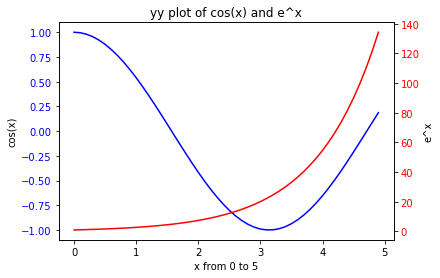

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

# Create data the data to plot
x = np.arange(0,5,0.1)
y1 = np.cos(x)
y2 = np.exp(x)

# Create the fig, ax objects
fig, ax1 = plt.subplots()

# plot the data and create a second ax object for the right-hard axis
ax1.plot(x,y1,'b')
ax1.set_xlabel('x from 0 to 5')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylabel('cos(x)')
ax1.set_title('yy plot of cos(x) and e^x')

ax2 = ax1.twinx()
ax2.plot(x,y2,'r')
#ax2.set_xlabel('x from 0 to 5')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylabel('e^x')

# show the plot
plt.show()

## Build subplots from an external data file

In [2]:
# show all the files in the same directory as the running Jupyter notebook
%ls   

 Volume in drive C is Windows
 Volume Serial Number is B899-AB94

 Directory of C:\Users\student\Desktop

10/16/2019  10:15 AM    <DIR>          .
10/16/2019  10:15 AM    <DIR>          ..
10/16/2019  09:17 AM    <DIR>          .ipynb_checkpoints
10/16/2019  09:40 AM            57,586 govt_camp_2013_01_to_2016_03.xlsx
10/16/2019  09:13 AM             1,457 Kaltura Capture.lnk
05/13/2016  01:33 PM               210 MSDS Online.url
08/01/2018  04:14 PM    <DIR>          Safety Information
10/16/2019  10:15 AM           100,023 Week4_plotting_notes_yyplots_subplots.ipynb
               4 File(s)        159,276 bytes
               4 Dir(s)  321,844,895,744 bytes free


### Import Packages: NumPy, Pandas, Matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

### Import the .xlsx datafile and clean it up so that years, months and days are in their own columns of a NumPy array

In [4]:
df = pd.read_excel('govt_camp_2013_01_to_2016_03.xlsx')
df.head()

,STATION,STATION_NAME,DATE,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130101,0.00,44,0.0,29,12
1,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130102,0.01,42,0.0,27,11
2,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130103,0.00,42,0.0,20,12
3,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130104,0.16,41,0.0,31,14
4,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130105,0.00,41,0.0,37,28


In [5]:
df = pd.read_excel('govt_camp_2013_01_to_2016_03.xlsx')
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.insert(0, 'year', pd.DatetimeIndex(df['DATE']).year)
df.insert(1, 'month', pd.DatetimeIndex(df['DATE']).month)
df.insert(2, 'day', pd.DatetimeIndex(df['DATE']).day)
df.drop(['DATE'],axis=1,inplace=True)
df.drop(['STATION','STATION_NAME'], axis=1, inplace=True)
print(df.shape)
df.head()
#df.tail()

(1186, 8)


,year,month,day,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,2013,1,1,0.00,44,0.0,29,12
1,2013,1,2,0.01,42,0.0,27,11
2,2013,1,3,0.00,42,0.0,20,12
3,2013,1,4,0.16,41,0.0,31,14
4,2013,1,5,0.00,41,0.0,37,28


In [6]:
wd = np.array(df)
print(wd.shape)

(1186, 8)


### Build 4 subplots, one year of data for each subplot

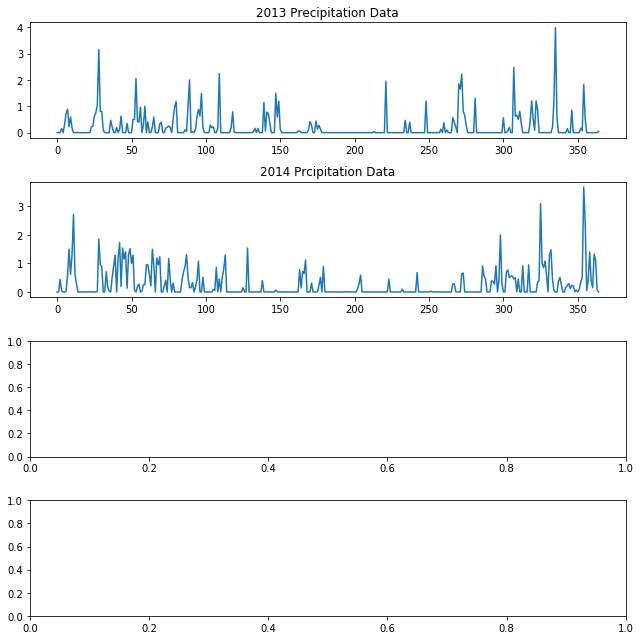

In [7]:
# Create the data, an array of precipitation in inches for each of the 4 years: 2013, 2014, 2015, 2016
mask2013 = wd[:,0]==2013
mask2014 = wd[:,0]==2014
precip = wd[:,3]
precip2013 = precip[mask2013]
precip2014 = precip[mask2014]


# fig, ax1, ax2, ax3, ax4 using plt.subplots and specify a larger figure size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(9,9))

# Plot the data and customize
ax1.plot(precip2013)
ax1.set_title('2013 Precipitation Data')

ax2.plot(precip2014)
ax2.set_title('2014 Prcipitation Data')

# show the plots
plt.tight_layout()
plt.show()